## **Ensembles**

Tree-based ensembles combine different trees using VOTING or AVERAGING to reduce the variance of trees. The different trees are obtained by changing the samples.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
## impute with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [4]:
## map Churn to yes: 1, no: 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
## drop customerID
df.drop('customerID', axis=1, inplace=True)

In [6]:
## dummy encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [8]:
## Create X and y vector
X = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
## split 80% 20% random_state = 591
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=591)

In [10]:
## imbalanced data set
y_train.value_counts()

,count
Churn,
0,4146
1,1488


In [11]:
## undersampling
from imblearn.under_sampling import RandomUnderSampler

## instance
rus = RandomUnderSampler(random_state=591)

## overwrite X_train and y_train
X_train, y_train = rus.fit_resample(X_train, y_train)

In [13]:
## balanced data set
## decision tree predictions are based on most common class
## balancing the data allows the algorithm to focus on BOTH classes equally
y_train.value_counts()

,count
Churn,
0,1488
1,1488


## **Decision Tree Classifier**

* grid search with CV

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
## Review, we performed GRIDSEARCH with CV to determine the best hyperparameters

## grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 6, 8, None],
    'max_leaf_nodes' : [10, 16, 20, None]
}

## sklearn GridSearchCV
from sklearn.model_selection import GridSearchCV

## instance of the MODEL
dt = DecisionTreeClassifier()  ## unrestricted

## instace of the GRID wrapper - name this your model
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

## fit
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, None],
                         'max_leaf_nodes': [10, 16, 20, None]})

In [17]:
## 5 data sets
## 1 tree (fold 2,3,4,5) - (Estimate Accuracy: Fold1)
## 1 tree (fold 1,3,4,5) - (Estimate Accuracy: Fold2)
## best hyperameters are {}
2*4*4*5  ## 32 trees looped 5 times each

160

In [18]:
## this is the best tree out of the 32 options that were checked
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10)

In [19]:
## What are the best hyperparameters?
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10}

In [20]:
## What is the estimated accuracy of the BEST hyparameter tree?
## accuracy is the DEFAULT SCORE (you can use recall, precision, f1, any scorer that you want)
dt_grid.best_score_

0.763780948621059

In [21]:
## you can predict the test data set
## 1) dt_grid.best_estimator_
## 2) dt_grid by default uses the best estimator
y_pred_tree = dt_grid.predict(X_test)

#### **Bagging Ensemble**

Bagging (Bootstrap Aggregating) uses the concept of bootstrap samples. Bootstrap samples are just sampled WITH replacement so that an observation can be in the sample MULTIPLE times.

In [24]:
## BOOTSTRAPPING
## random sample WITH replace
df10 = df.head(10)
df10

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,8,99.65,820.50,1,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
8,0,28,104.80,3046.05,1,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
9,0,62,56.15,3487.95,0,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


In [26]:
## bootstrap sample of ALSO 10 observations
df10.sample(10, replace=True)
## fit a decision tree on THIS bootstrap sample

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False


In [ ]:
## Obs 1, Obs 5, Obs 8 were NOT selected on this example
## can use these to ESTIMATE the model performance (OUT-OF-BAG ESTIMATE)

In [27]:
from sklearn.ensemble import BaggingClassifier

In [44]:
## import under ensembles
from sklearn.ensemble import BaggingClassifier

## ideally you want a gridsearchcv here as well
## to give an example let's just fit a small bagging ensemble
## instance

bag = BaggingClassifier(estimator = DecisionTreeClassifier(criterion = "gini", max_depth = 4),
                        n_estimators = 3, random_state = 591, n_jobs = -1, oob_score = True)

## fit on training
bag.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=3,
                  n_jobs=-1, oob_score=True, random_state=591)

In [45]:
## out-of-bag estimate of the ACCURACY (default)
bag.oob_score_

0.6801075268817204

In [46]:
## Trees Ensembles
bag.estimators_

[DecisionTreeClassifier(max_depth=4, random_state=339579548),
 DecisionTreeClassifier(max_depth=4, random_state=1625607329),
 DecisionTreeClassifier(max_depth=4, random_state=1649997184)]

In [47]:
## these are the variable numbers
X_train.columns[bag.estimators_features_[2]]

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [48]:
## when the individual trees are FIT, they do NOT the original variable NAME
bag.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])]

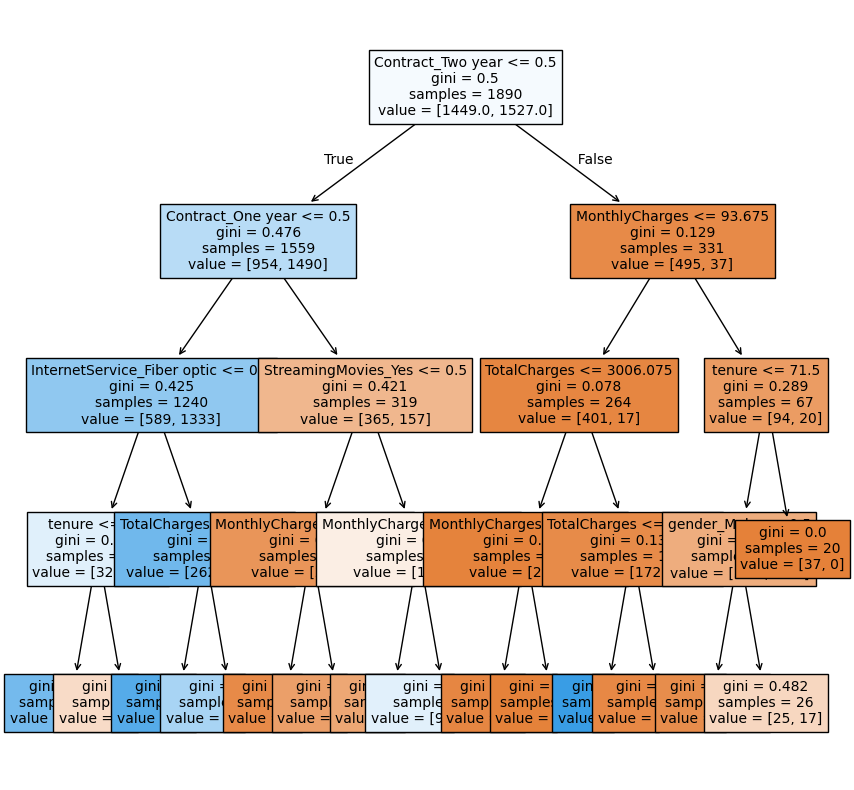

In [51]:
## tree # 1
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree (bag.estimators_[0], feature_names = X_train.columns, filled = True, fontsize = 10);

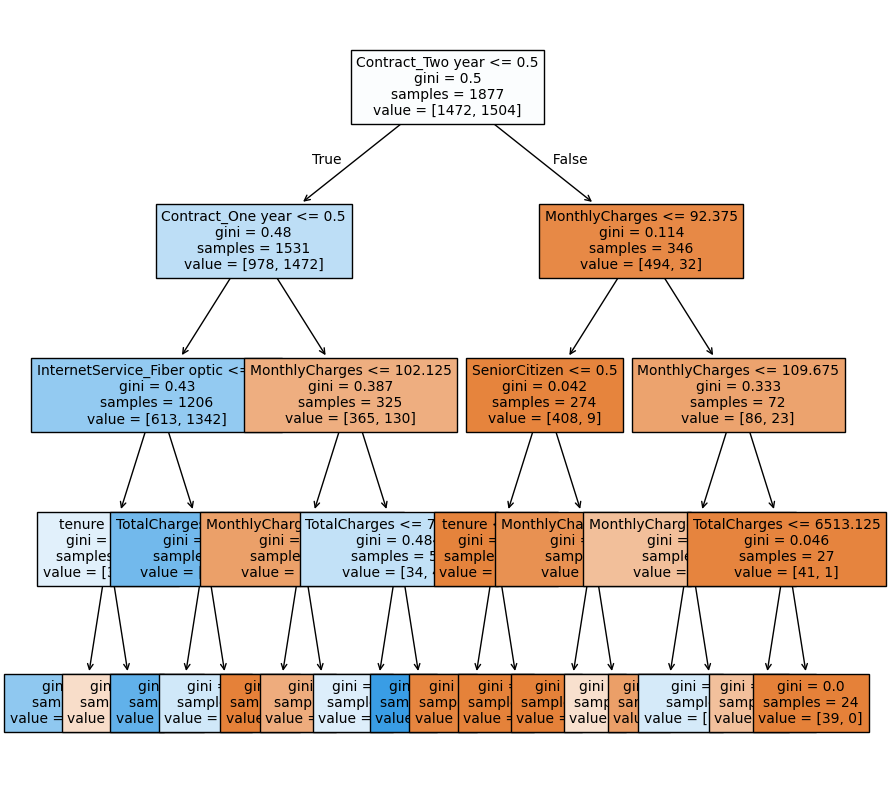

In [52]:
## tree # 2
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree (bag.estimators_[1], feature_names = X_train.columns, filled = True, fontsize = 10);

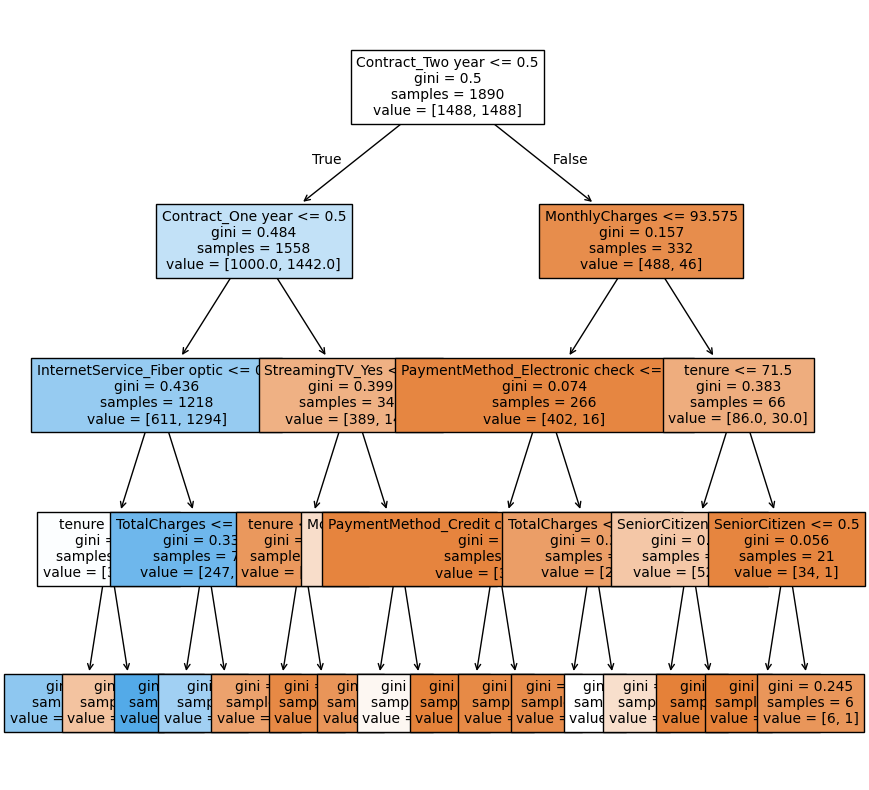

In [53]:
## tree # 3
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree (bag.estimators_[2], feature_names = X_train.columns, filled = True, fontsize = 10);

In [40]:
## How is the first observation on the test predicted
## The prediction of the ENSEMBLE is the majority vote of the individual trees (voting)
## The probability estimate of the ENSEMLBE is the average of the individual trees (averaging)
bag.predict_proba(X_test)[:,1][0]

0.6003240727252885

In [41]:
bag.estimators_[0].predict_proba(X_test)[:,1][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.6096563011456628

In [42]:
bag.estimators_[1].predict_proba(X_test)[:,1][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.6008163265306122

In [43]:
bag.estimators_[2].predict_proba(X_test)[:,1][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.5904995904995906

Bagging improves the variance, but if we have DOMINANT (two-year contract), they tend to get picked in the splits regardless of the sample (bootstrap). Modifying the Bagging ensemble to FORCE it to select different variables can reduce the variance.

## **Random Forests**

The idea is to create (combine) different decision trees by performing the following changes in the datasets:

* bootstrap sample of the data is taken (if X_train has 100 obs, X_train_Bootstrap has 100 obs)
* a random sample of variables are selected. By default, $\sqrt(p)$ is selected.

In [54]:
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier(n_estimators = 3, max_depth = 3, random_state = 591, n_jobs = -1)

## fit
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=3, n_jobs=-1, random_state=591)

In [55]:
## Estimators (trees combined)
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=273192155),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2037088570),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=198996421)]

In [59]:
## tree 1 Variables selected
## estimators_features
## each tree selected different variables (which variables were selected per tree)

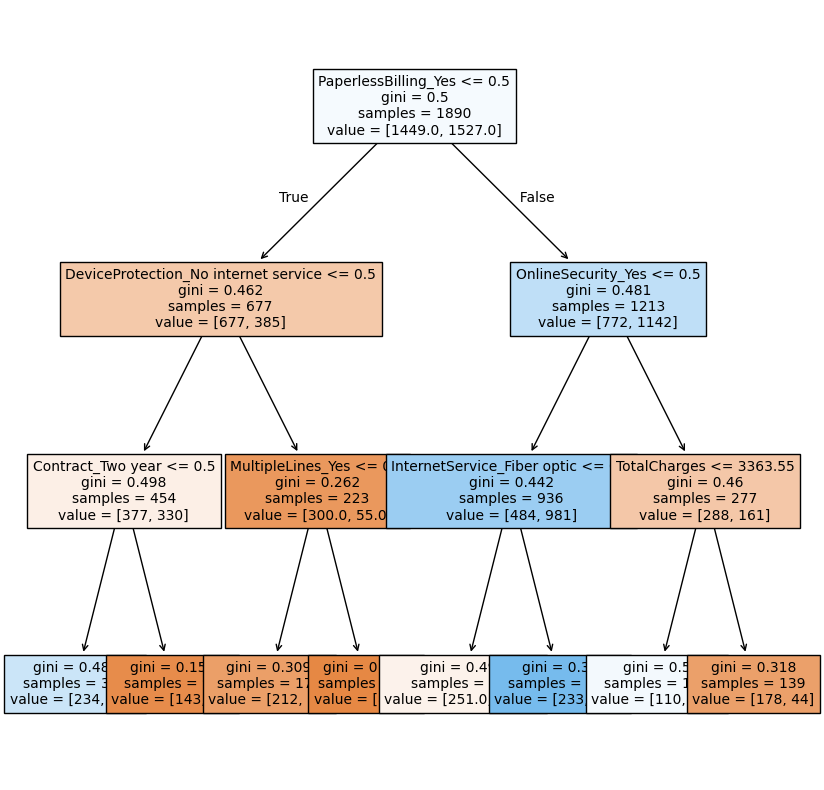

In [60]:
plt.figure(figsize=(10,10))
plot_tree (rf.estimators_[0], feature_names = X_train.columns, filled = True, fontsize = 10);

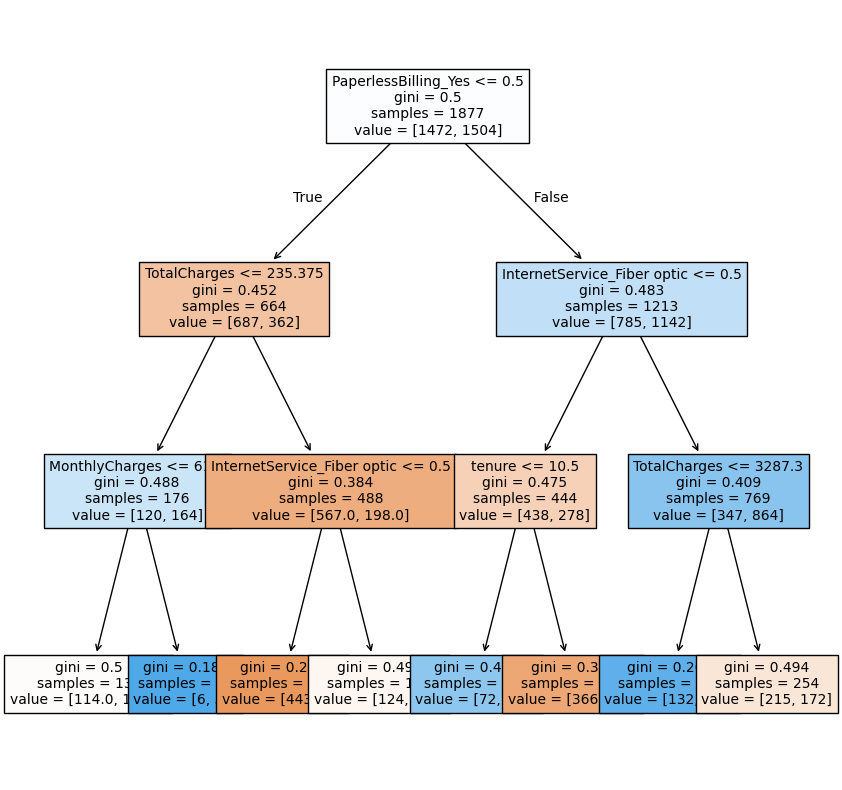

In [61]:
plt.figure(figsize=(10,10))
plot_tree (rf.estimators_[1], feature_names = X_train.columns, filled = True, fontsize = 10);

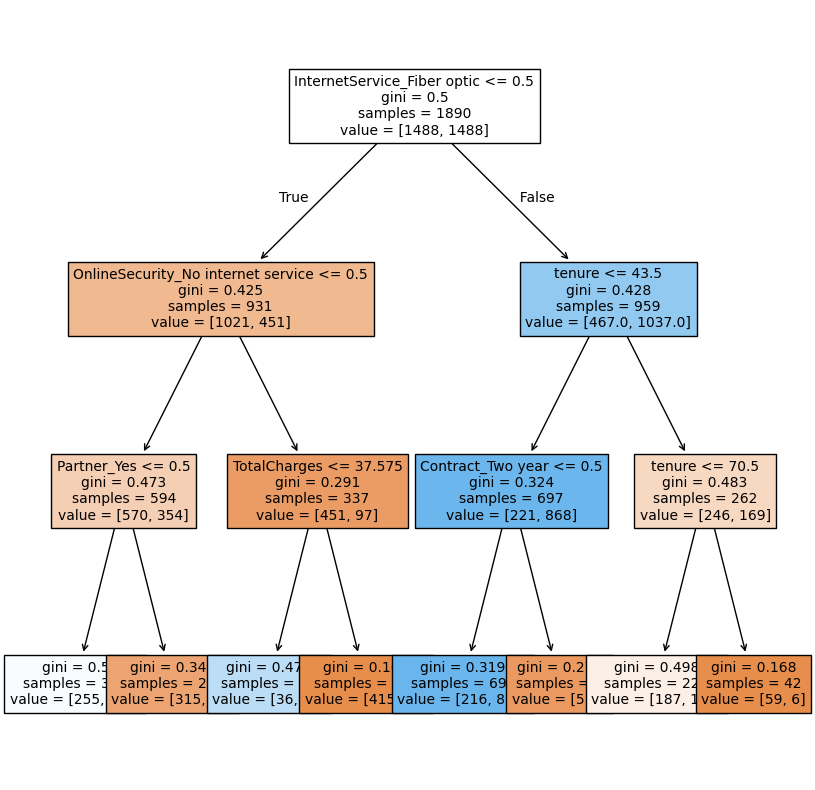

In [62]:
plt.figure(figsize=(10,10))
plot_tree (rf.estimators_[2], feature_names = X_train.columns, filled = True, fontsize = 10);

## **Boosted Trees**

The trees are fit sequentially. Each tree focuses on the ERRORS of the previous tree in both classification and regression problems. The original boosting is AdaBoost (Adaptive Boosting) but there are many different implementations with important modifications.

In [64]:
from sklearn.ensemble import AdaBoostClassifier

## instance - trees are fit sequential (1 tree has to finish running before the next one starts)
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 3, random_state = 591)

## fit
adaboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=3, random_state=591)

In [66]:
## different decision trees
adaboost.estimators_

[DecisionTreeClassifier(max_depth=3, random_state=273192155),
 DecisionTreeClassifier(max_depth=3, random_state=2037088570),
 DecisionTreeClassifier(max_depth=3, random_state=198996421)]

In [67]:
## averaging and voting still works

#### **Modifications to AdaBoost**

- Gradient descent is used in GradientBoosting (improves the performance)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

## instance
gboost = GradientBoostingClassifier(n_estimators = 3, random_state = 591)

## fit
gboost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=3, random_state=591)

In [69]:
## gradient boosting works sequentially (next tree uses the residuals of the previous tree)
## gradient descent (on those residuals) - loss function (MSE)
## LARGE DATA SET  (100 TREES) can take too long

#### **Extreme Gradient Boosting**

XGBoost is able to make parallel processing on Boosting.

In [70]:
from xgboost import XGBClassifier

In [71]:
## instance
xgb = XGBClassifier(n_estimators = 3, random_state = 591, n_jobs = -1)

## fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=-1,
              num_parallel_tree=None, random_state=591, ...)

In [72]:
## catboost works well with CATEGORICAL predictors
## XGBoost is too slow when using dummy-encoded vars
## catboost can use GPU cores compared to CPU cores which enhances computational speed